# Voting Classifier on Titanic 

In addition to stacking, voting classifier or averaging regressors are ensemble methods that can be used to improve the performance of a predictor by combining the predictions of a collection of different models (by voting or averaging).

Let's apply the voting classifier method on the Titanic dataset.


1. Import librairies

In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import re


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

!pip install missingpy
from missingpy import KNNImputer

2. Import the data using the following link s3://full-stack-bigdata-datasets/Machine Learning Supervisé/stacking/titanic.csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Passez par la même phase de preprocessing que lorsque nous avons fait du Stacking 

In [4]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title
0,0,3,male,22.0,0,7.2500,S,23,0,2,0,0,1.0,Mr
1,1,1,female,38.0,0,71.2833,C,51,1,2,0,3,2.0,Mrs
2,1,3,female,26.0,0,7.9250,S,22,0,1,1,1,1.0,Miss
3,1,1,female,35.0,0,53.1000,S,44,1,2,0,3,2.0,Mrs
4,0,3,male,35.0,0,8.0500,S,24,0,1,1,1,2.0,Mr


4. Séparez votre dataset en X & y qui sont respectivement les variables explicatives et la variable cible

5. Faites un train_test_split

6. Normalisez votre dataset

7. Remplace the remaining missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       668 non-null    float64
 1   1       668 non-null    float64
 2   2       668 non-null    float64
 3   3       668 non-null    float64
 4   4       668 non-null    float64
 5   5       668 non-null    float64
 6   6       668 non-null    float64
 7   7       668 non-null    float64
 8   8       668 non-null    float64
 9   9       668 non-null    float64
 10  10      668 non-null    float64
 11  11      668 non-null    float64
 12  12      668 non-null    float64
 13  13      668 non-null    float64
 14  14      668 non-null    float64
 15  15      668 non-null    float64
 16  16      668 non-null    float64
dtypes: float64(17)
memory usage: 88.8 KB


8. Import the following modules : 

 1. DecisionTreeClassifier
 2. KNeighborsClassifier
 3. GaussianNB
 4. LogisticRegression

9. Create an empty list called ```classifiers``` that contains an instance of each of the imported models.

10. For each model, produce a cross validation score and store the results in a list called ```cv_results```

In [12]:
cv_results

[array([0.79104478, 0.73134328, 0.8358209 , 0.92537313, 0.82089552,
        0.8358209 , 0.76119403, 0.80597015, 0.78787879, 0.75757576]),
 array([0.73134328, 0.7761194 , 0.85074627, 0.86567164, 0.79104478,
        0.80597015, 0.76119403, 0.8358209 , 0.84848485, 0.78787879]),
 array([0.7761194 , 0.7761194 , 0.79104478, 0.85074627, 0.82089552,
        0.79104478, 0.71641791, 0.80597015, 0.66666667, 0.71212121]),
 array([0.79104478, 0.7761194 , 0.86567164, 0.88059701, 0.85074627,
        0.85074627, 0.71641791, 0.85074627, 0.83333333, 0.77272727])]

11. Create a DataFrame containing : 

- Col 1 = name of the model 
- Col 2 = mean accuracy score
- Col 3 = standard deviation of accuracy score

Sort the models by descending order of mean performance

,Algorithm,Accuracy_mean,Std
3,logreg,0.818815,0.049483
1,knn,0.805427,0.041569
0,tree,0.805292,0.051695
2,nb,0.770715,0.053159


12. Visualise these results in a barplot

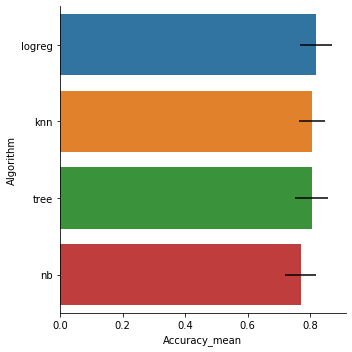

12. Run a grid search in order to optimise the parameters for each of these models

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
best Tree score on the train set : 
 0.8098802395209581 
 best Tree score on the test set : 
 0.8385650224215246
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.3s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 10 folds for each of 9 candidates, totalling 90 fits
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
best Knn score on the train set : 
 0.8517964071856288 
 best Knn score on the test set : 
 0.8295964125560538
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.0s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 10 folds for each of 12 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.1s finished
best Logistic regression score on the train set : 
 0.8248502994011976 
 best Logistic regression score on the test set : 
 0.8340807174887892


13. Import VotingClassifier and insert all the optimise models inside to create a voting classifier instance

14. What's the score from your voting classifier

Voting Classifier score on the train set : 
 0.8338323353293413 
 best Voting Classifier score on the test set : 
 0.8340807174887892


15. Get the cross validation score for the voting classifier, is the model stable ? 

the average score is : 0.8113071008593395 
 the standard deviation of the score is : 0.04717554468937062 
 the list of score : [0.79104478 0.7761194  0.86567164 0.86567164 0.8358209  0.8358209
 0.71641791 0.85074627 0.75757576 0.81818182]


---> The average cross validation score is above the score we got on the test set, and the model's performances seem rather stable. Though you may be disapointed not to have improved the test score compared to the base models, the main idea of averaging and voting classifiers is to have a both performant and stable model by averaging out the advantages and pitfalls of a collection of models